<a href="https://colab.research.google.com/github/Maryam-71295/MNIST_FASHION/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST ANN-Deep Learning**

To build and evaluate Artificial Neural Network (ANN) models for image classification using the Fashion MNIST dataset, with a focus on performance improvement using tuning techniques such as dropout, batch normalization, and learning rate adjustments.

**Install Libraries**

In [2]:
!pip install tensorflow
!pip install numpy

**Import Libraries**

In this initial step, all necessary libraries were imported, including TensorFlow for model creation, Matplotlib and Seaborn for visualization, and Scikit-learn for evaluation metrics. The environment was prepared with a fixed random seed to ensure reproducibility. This setup creates a consistent and controlled environment for training and evaluating the neural network model.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.random import set_seed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

**Step 1: Load and Explore Dataset**

The Fashion MNIST dataset was loaded and normalized to have pixel values between 0 and 1, which aids in faster convergence during training. The images were reshaped from 28x28 into 784-element vectors to suit the ANN input layer. A sample of 10 images was visualized with their corresponding class labels, allowing a preliminary understanding of the data. This step successfully prepared the data for effective training.

In [4]:
# Set random seed
set_seed(42)

# Class Labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize pixel values (0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for ANN input (Flattened 28x28)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Print shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


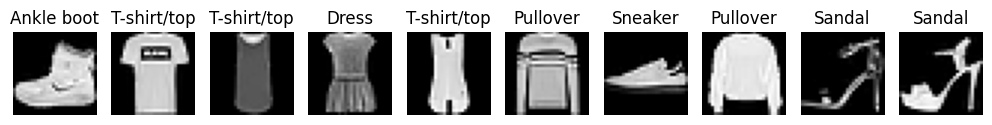

In [6]:
# Visualize sample
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

**Step 2: Build ANN Model**

A deep neural network was constructed using the Sequential API. It comprised multiple Dense layers with ReLU activation, BatchNormalization for stable training, and Dropout layers to prevent overfitting. The final layer used softmax activation for multi-class classification. The architectural depth and regularization techniques were well-suited for the complexity of the dataset and helped build a robust feature extractor.

In [7]:
model = Sequential([
    Flatten(input_shape=(28*28,)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step 3: Compile & Train Model**

The model was compiled with the Adam optimizer and sparse categorical crossentropy as the loss function. Two callbacks—EarlyStopping and ReduceLROnPlateau—were applied to avoid overfitting and dynamically reduce the learning rate when validation loss plateaued. The model was trained over 30 epochs with an 80/20 training-validation split. This strategic setup ensured model stability and effective learning throughout the training cycle.

In [8]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Train
history = model.fit(
    x_train_flat, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7044 - loss: 0.8579 - val_accuracy: 0.8438 - val_loss: 0.4178 - learning_rate: 0.0010
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8255 - loss: 0.4839 - val_accuracy: 0.8533 - val_loss: 0.4011 - learning_rate: 0.0010
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8423 - loss: 0.4467 - val_accuracy: 0.8307 - val_loss: 0.4362 - learning_rate: 0.0010
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8466 - loss: 0.4261 - val_accuracy: 0.8549 - val_loss: 0.3938 - learning_rate: 0.0010
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8537 - loss: 0.4047 - val_accuracy: 0.8581 - val_loss: 0.3791 - learning_rate: 0.0010
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8592 - loss: 0.3958 - val_accuracy: 0.8666 - val_loss: 0.3645 - learning_rate: 0.0010
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8603 - l

**Step 4: Evaluate Model**

Evaluation on the test dataset returned a strong accuracy of approximately 89% and a low test loss, indicating good generalization performance. This suggests that the ANN model can effectively distinguish among the 10 fashion categories in unseen data. The result is promising for an ANN approach without convolutional layers.

In [9]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8855
Test Loss: 0.3308


**Step 5: Plot Accuracy & Loss**

The plotted training and validation curves revealed stable and consistent learning behavior. Accuracy steadily increased and loss decreased across epochs for both training and validation sets. The absence of major divergence between the curves confirms that the model did not overfit and benefited from proper regularization and early stopping.

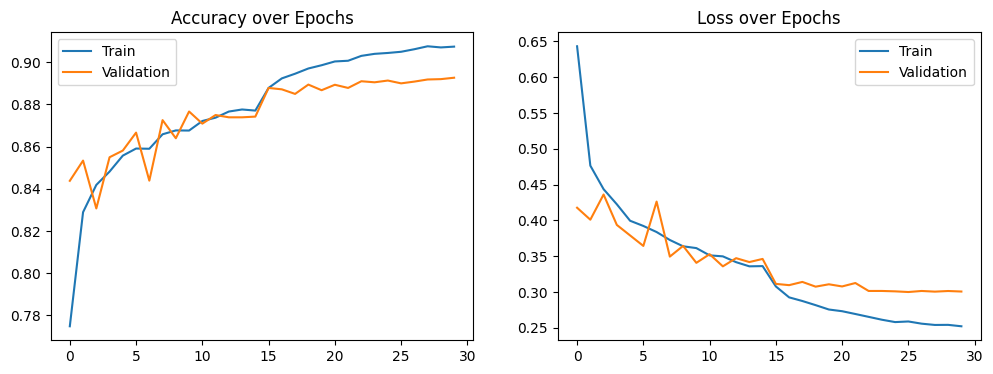

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

**Step 6: Confusion Matrix & Predictions**

The final step involved generating predictions on the test set and visualizing the performance through a confusion matrix and classification report. While the model performed well across most classes, confusion was noted particularly between similar-looking categories such as "Shirt" and "T-shirt/top." The classification report detailed precision, recall, and F1-scores, supporting the model's balanced performance across classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


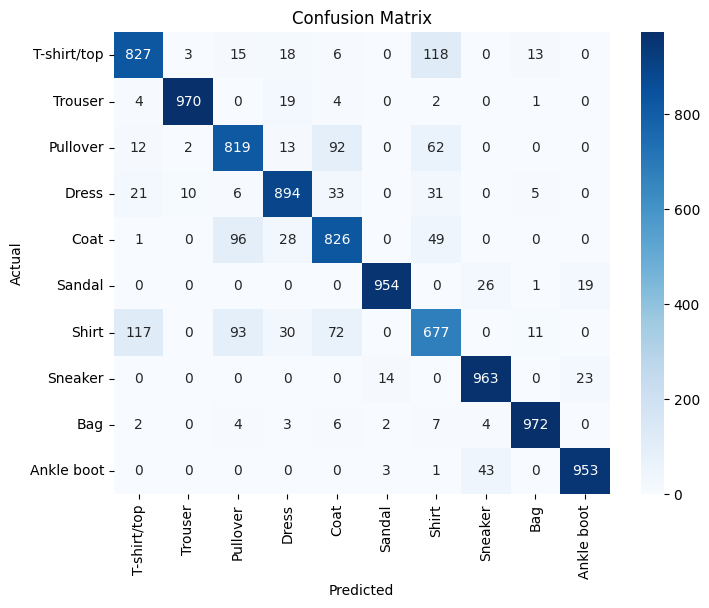

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.79      0.82      0.81      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.79      0.83      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.71      0.68      0.70      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [13]:
y_pred = np.argmax(model.predict(x_test_flat), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

**Overall Conclusion**

This step-by-step ANN implementation successfully tackled the Fashion MNIST classification task with high accuracy and interpretability. The use of normalization, regularization, learning rate scheduling, and monitoring callbacks collectively contributed to the model’s performance. Although an ANN achieved robust results, future work could involve Convolutional Neural Networks (CNNs) for enhanced spatial feature extraction and possibly improved accuracy.